In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Our Data

In [2]:
def by_year_summed(name):
    """
    Reads a csv file and sums by year.
    The argument is the filename
    
    Returns a pandas.Series containing the index
    """
    basic = pd.read_csv(name)
    basic['sum'] = basic.iloc[:, 2:].sum(axis=1)
    basic = basic[['month', 'year', 'sum']]
    yearly = basic[['year', 'sum']].groupby('year').sum()
    yearly.columns = ['our index']
    return yearly['our index']

Text(0.5,1,'titles, unnormalized')

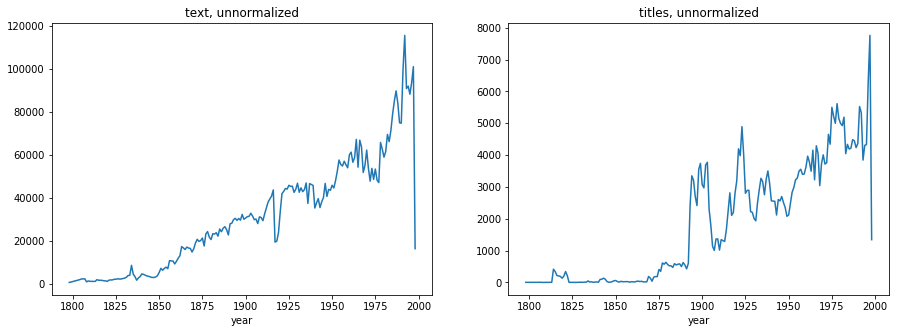

In [3]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
text_unnorm = by_year_summed('countries-text.csv')
titles_unnorm = by_year_summed('countries-titles.csv')
text_unnorm.plot(ax=ax1)
ax1.set_title('text, unnormalized')
titles_unnorm.plot(ax=ax2)
ax2.set_title('titles, unnormalized')

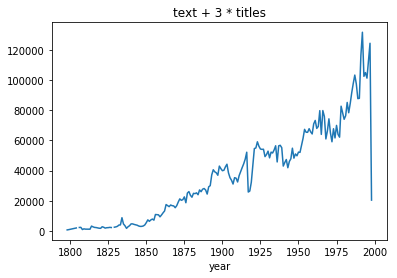

In [4]:
text_3titles_unnormalized = (text_unnorm + 3*titles_unnorm)
text_3titles_unnormalized.plot(title='text + 3 * titles')

Text(0.5,1,'titles, normalized')

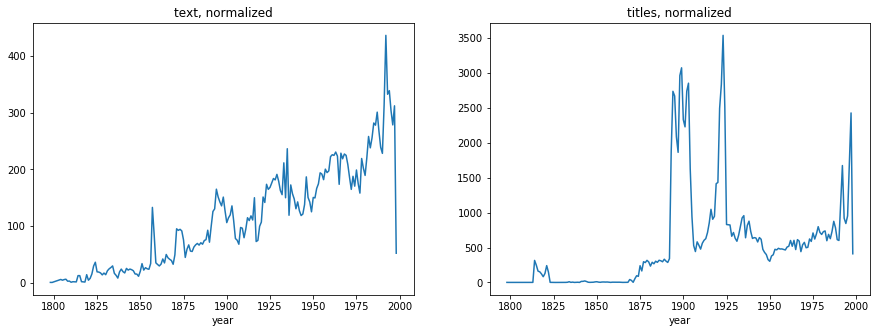

In [5]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
text_norm = by_year_summed('countries-text-normalized.csv')
titles_norm = by_year_summed('countries-titles-normalized.csv')
text_norm.plot(ax=ax1)
ax1.set_title('text, normalized')
titles_norm.plot(ax=ax2)
ax2.set_title('titles, normalized')

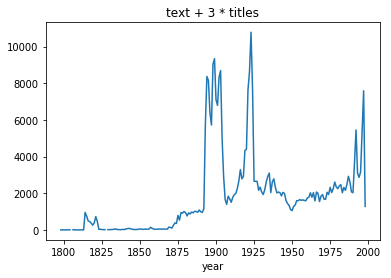

In [6]:
text_3titles_normalized = (text_norm + 3*titles_norm)
text_3titles_normalized.plot(title='text + 3 * titles')

# KOF Data

In [7]:
all_kof = pd.read_excel('KOF_data.xlsx')

In [8]:
swiss_kof = all_kof[all_kof.country == 'Switzerland'] # Retain only Swiss data
swiss_kof = swiss_kof.iloc[:, 2:] # Retain only year and indices
swiss_kof = swiss_kof.set_index('year') # Index by year

In [9]:
swiss_kof.head()

,KOFGI,KOFGIdf,KOFGIdj,KOFEcGI,KOFEcGIdf,KOFTrGIdf,KOFFiGIdf,KOFEcGIdj,KOFTrGIdj,KOFFiGIdj,...,KOFIpGIdf,KOFInGIdf,KOFCuGIdf,KOFSoGIdj,KOFIpGIdj,KOFInGIdj,KOFCuGIdj,KOFPoGI,KOFPoGIdf,KOFPoGIdj
year,,,,,,,,,,,,,,,,,,,,,
1970,72.391129,69.312744,75.469505,66.649139,59.546032,39.298573,79.793495,73.752243,56.223392,91.281097,...,79.627975,93.380112,55.414879,72.447136,69.037819,69.621597,78.682007,76.230194,72.251228,80.209152
1971,72.636917,69.295120,75.978706,66.649139,59.546032,39.298573,79.793495,73.752243,56.223392,91.281097,...,79.881645,93.380112,55.002602,72.577011,69.427444,69.621597,78.682007,76.929047,72.251228,81.606857
1972,73.103912,69.322426,76.885391,66.621391,59.490543,39.187595,79.793495,73.752243,56.223392,91.281097,...,79.881645,93.380112,55.414879,72.706894,69.817070,69.621597,78.682007,78.224136,72.251228,84.197052
1973,74.531502,71.567291,77.495720,67.069153,59.490543,39.187595,79.793495,74.647774,58.014446,91.281097,...,80.135315,93.380112,74.216003,72.836769,70.206703,69.621597,78.682007,78.818405,72.634201,85.002617
1974,74.892609,71.568558,78.216675,67.689705,59.657009,39.520527,79.793495,75.722404,60.163712,91.281097,...,80.135315,93.098312,74.009865,73.323357,70.206703,69.621597,80.141769,79.119225,72.634201,85.604248


In [10]:
swiss_kof.columns

Index(['KOFGI', 'KOFGIdf', 'KOFGIdj', 'KOFEcGI', 'KOFEcGIdf', 'KOFTrGIdf',
       'KOFFiGIdf', 'KOFEcGIdj', 'KOFTrGIdj', 'KOFFiGIdj', 'KOFSoGI',
       'KOFSoGIdf', 'KOFIpGIdf', 'KOFInGIdf', 'KOFCuGIdf', 'KOFSoGIdj',
       'KOFIpGIdj', 'KOFInGIdj', 'KOFCuGIdj', 'KOFPoGI', 'KOFPoGIdf',
       'KOFPoGIdj'],
      dtype='object')

# Compare the two

In [11]:
def join_indices(our_index, their_index):
    """
    Normalizes the values of the two indices before
    joining them.
    
    Both arguments are pandas Series indexed by year.
    """
    # INDEX of BOTH must be the year
    # Both arguments are DF with only one column
    
    # Study the correct time range
    our_index   = our_index.loc[our_index.index >= 1970]
    our_index   = our_index.loc[our_index.index < 1998]
    their_index = their_index.loc[their_index.index >= 1970]
    their_index = their_index.loc[their_index.index < 1998]
    
    # Bring all values in % (val - min) / (max - min)
    our_index_scaled = (our_index - our_index.min()) / (our_index.max() - our_index.min()) * 100
    their_index_scaled = (their_index - their_index.min()) / (their_index.max() - their_index.min()) * 100
    
    # Join and return
    return pd.DataFrame(our_index_scaled).join(pd.DataFrame(their_index_scaled), how='inner')

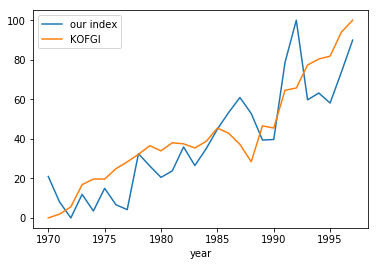

In [12]:
join_indices(text_3titles_unnormalized, swiss_kof['KOFGI']).plot()

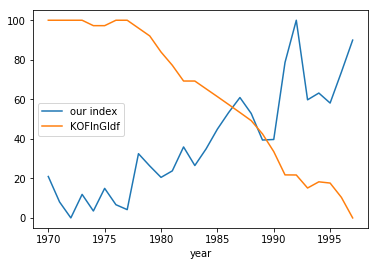

In [13]:
join_indices(text_3titles_unnormalized, swiss_kof['KOFInGIdf']).plot()